# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
btc_price = btc_price['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_price =eth_price['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $44803.20
The current value of your 5.3 ETH is $12994.65


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df


# Preview DataFrame
df_portfolio

AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2022-01-14 00:00:00-05:00  112.53  112.545  112.15  112.17  8362916  461.19   

                                                            
                             high    low   close    volume  
time                                                        
2022-01-14 00:00:00-05:00  465.09  459.9  464.68  84363989

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio['AGG']['close'][0]
spy_close_price = df_portfolio['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $112.17
Current SPY closing price: $464.68


In [10]:
# Compute the current value of shares
my_spy = 50
my_agg = 200

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23234.00
The current value of your 200 AGG shares is $22434.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
assets = ['crypto', 'shares']
values = {'amount' : [my_btc_value + my_eth_value, my_spy_value + my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(values, index=assets)

# Display savings DataFrame
display(df_savings)

,amount
crypto,57797.846
shares,45668.000


<AxesSubplot:title={'center':'Composition of Savings'}, ylabel='amount'>

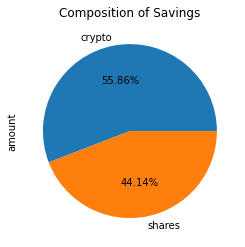

In [12]:
df_savings['amount'].plot(kind='pie',title='Composition of Savings',autopct='%1.2f%%')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings_amount = df_savings['amount'].sum(axis=0)

# Validate saving health
if total_savings_amount > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings_amount == emergency_fund:
    print("Congratulating you are reaching the financial goal")
else:
    print(f"You need {emergency_fund - total_savings_amount} to reach the goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

# Get 5 year's worth of historical price data
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_thirtyyears.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [17]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kazukitakehashi/Kaz/ASU/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995392,0.990470,0.993427,0.997569,1.001835,0.999915,0.993556,1.013778,1.000118,1.005522,...,1.004222,0.991307,1.019722,0.997582,0.984832,0.988248,0.991770,1.010311,0.999268,0.998073
2,0.996701,0.991013,0.987639,0.996361,1.009570,0.990596,0.997980,1.010089,1.030616,1.010101,...,1.006502,0.991912,1.012519,0.995174,0.982620,0.982174,0.994372,1.022663,0.996759,0.993889
3,0.992932,0.988306,0.985351,1.003702,1.018193,0.973725,1.004850,1.010335,1.042511,0.999493,...,1.012683,0.989087,1.004182,0.985428,0.991218,0.989511,1.006275,1.016462,1.000043,1.000270
4,0.990997,0.988694,0.984690,1.006514,1.026926,0.959125,1.004485,1.006617,1.050057,0.990280,...,1.008963,0.986295,0.999710,0.996380,0.998228,1.007984,0.994180,1.023077,0.989455,0.996364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.529862,11.938520,9.934452,6.822609,12.710330,4.881023,4.819315,46.414601,29.771434,11.252100,...,11.311927,20.049722,6.140657,18.656765,8.538309,20.940601,28.884713,11.105654,41.050365,15.812556
7557,5.491631,11.842289,9.892089,6.831041,12.653224,4.932384,4.884033,46.637324,29.767587,11.257526,...,11.414946,20.303819,6.110854,18.796941,8.598159,20.926270,28.886428,11.326889,41.142235,15.893757
7558,5.553491,11.754065,9.765315,6.886064,12.647788,4.942621,4.917932,46.295383,29.224008,11.402429,...,11.296943,20.124397,6.099670,18.896082,8.684813,20.745049,28.727542,11.377164,41.349895,15.763958
7559,5.481338,11.925820,9.715573,6.930884,12.768291,4.913593,4.876313,46.755960,29.012735,11.562995,...,11.438422,20.121884,6.051218,18.801278,8.669794,21.029967,28.678633,11.444865,40.749200,15.947746


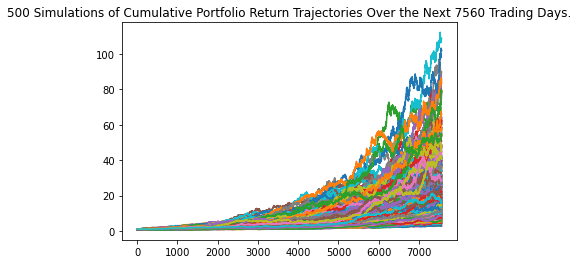

In [18]:
# Plot simulation outcomes
line_plot = MC_thirtyyears.plot_simulation()

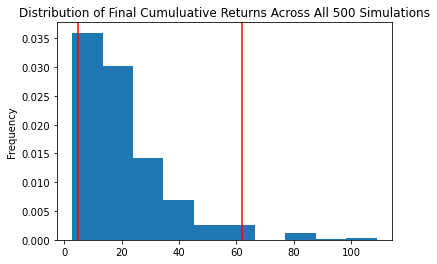

In [19]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyears.plot_distribution()

### Retirement Analysis

In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl = MC_thirtyyears.summarize_cumulative_return()

# Print summary statistics
print(stocks_tbl)

count           500.000000
mean             20.815423
std              15.833475
min               2.760682
25%              10.147163
50%              15.933746
75%              26.730965
max             108.898048
95% CI Lower      4.867107
95% CI Upper     62.004357
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [21]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stocks_tbl[8]*initial_investment,2)
ci_upper = round(stocks_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $97342.13 and $1240087.15


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [22]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stocks_tbl[8]*initial_investment,2)
ci_upper = round(stocks_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $146013.2 and $1860130.72


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [23]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_fiveyears.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [24]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kazukitakehashi/Kaz/ASU/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991787,1.008687,0.995332,0.995962,0.998271,1.003326,0.997610,0.995519,1.012630,1.001873,...,0.997880,0.995401,1.001554,1.006180,0.993847,1.009495,0.990766,0.985781,0.999085,1.008553
2,0.982263,1.027087,1.004062,0.984268,0.997575,1.001426,0.997198,0.986331,0.999141,0.994080,...,1.002080,0.995573,1.001838,0.990946,1.001445,1.009903,0.991061,0.997077,0.991579,1.013685
3,0.985322,1.023878,1.009363,0.988388,0.997988,1.003616,0.991060,0.977781,0.997509,0.992399,...,1.000424,0.998224,1.006309,0.999139,0.998021,1.012170,1.018347,1.004989,0.991360,1.019074
4,0.973051,1.010222,1.006280,0.986998,0.994627,0.992445,1.003010,0.982724,1.002945,0.991259,...,0.993282,0.987342,1.002734,1.022198,0.995657,1.022653,1.014055,1.002740,0.996602,1.018026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.884794,1.318793,1.650707,1.887642,1.526403,2.262223,1.325846,2.214942,1.725282,1.515914,...,0.894442,1.738970,2.568384,1.693818,1.530686,3.163176,1.661095,2.258741,1.447211,2.066873
1257,1.904941,1.323551,1.667662,1.869507,1.529751,2.271427,1.316381,2.221229,1.730111,1.528876,...,0.895407,1.742018,2.574683,1.695404,1.515003,3.148089,1.652039,2.264011,1.449542,2.096962
1258,1.916650,1.313432,1.672583,1.853829,1.548449,2.265762,1.307062,2.214600,1.737576,1.537637,...,0.907530,1.751166,2.595709,1.688972,1.510832,3.159326,1.666452,2.281072,1.445496,2.081612
1259,1.910012,1.301973,1.683625,1.835553,1.570388,2.273923,1.323399,2.216383,1.753985,1.542804,...,0.915111,1.760057,2.630033,1.698501,1.505452,3.188654,1.644264,2.289636,1.445447,2.084526


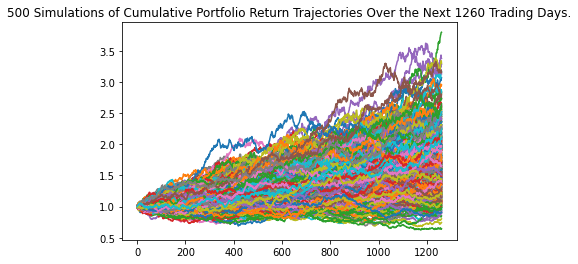

In [25]:
# Plot simulation outcomes
line_plot = MC_fiveyears.plot_simulation()

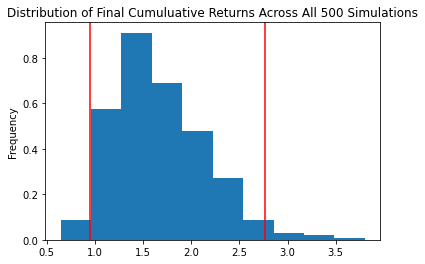

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyears.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyears_tbl = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(fiveyears_tbl)

count           500.000000
mean              1.665659
std               0.478332
min               0.642598
25%               1.344273
50%               1.591100
75%               1.959490
max               3.802951
95% CI Lower      0.949712
95% CI Upper      2.768698
Name: 1260, dtype: float64


In [28]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = round(fiveyears_tbl[8]*initial_investment,2)
ci_upper_five = round(fiveyears_tbl[9]*initial_investment,2)



# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56982.73 and $166121.88


### Ten Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_tenyears.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [30]:
MC_tenyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/kazukitakehashi/Kaz/ASU/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982556,1.005000,1.002153,1.002307,1.003451,1.004173,0.997657,0.997249,1.000032,0.996214,...,1.014865,0.996997,1.006307,0.995783,0.994907,1.007849,1.005753,0.988736,0.993725,0.987946
2,0.978233,1.012118,0.999853,0.998256,1.022527,1.000835,1.002313,0.995755,1.015067,0.993841,...,1.018973,0.996836,1.000747,1.001962,1.005579,1.009246,1.005002,0.989238,0.982403,0.981783
3,0.974931,1.004990,1.005258,0.989506,1.009318,1.004523,0.996757,1.005894,1.026496,0.996400,...,1.006449,1.001305,0.994846,1.004444,1.015370,1.006597,0.996144,0.975089,0.977505,0.982183
4,0.966981,1.003016,1.008486,0.981296,1.023686,1.006897,0.995559,0.995579,1.012965,1.005108,...,1.006650,0.999780,0.992982,1.008746,1.026599,0.996987,1.007403,0.988880,0.975560,0.987093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.937725,2.024431,1.610751,1.819262,3.508207,2.726169,2.446164,1.478299,2.064100,3.829558,...,1.966842,5.967031,8.738715,2.259988,2.200618,1.909613,2.414748,2.722561,3.667646,2.693015
2517,2.936308,2.031672,1.582341,1.827901,3.481403,2.760460,2.464347,1.478521,2.042571,3.825054,...,1.968488,5.959020,8.691202,2.208070,2.202863,1.924829,2.412814,2.709679,3.685129,2.684648
2518,2.972143,2.040695,1.605620,1.832709,3.476238,2.748057,2.481692,1.484666,2.031831,3.810648,...,1.965106,5.962313,8.622398,2.204027,2.218090,1.959235,2.408730,2.691477,3.669267,2.699536
2519,2.986884,2.044627,1.627402,1.843596,3.486755,2.765536,2.455041,1.465059,2.029653,3.858679,...,1.945874,5.968538,8.681595,2.220344,2.211658,2.002777,2.400813,2.696757,3.645336,2.719938


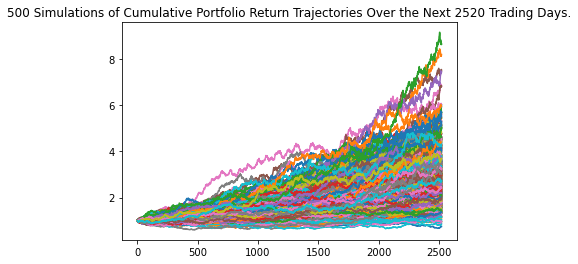

In [31]:
# Plot simulation outcomes
line_plot = MC_tenyears.plot_simulation()

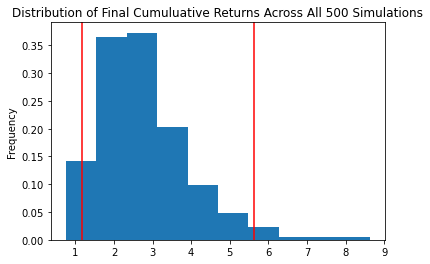

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyears.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tenyears_tbl = MC_tenyears.summarize_cumulative_return()

# Print summary statistics
print(tenyears_tbl)

count           500.000000
mean              2.788408
std               1.178950
min               0.749885
25%               1.971318
50%               2.558867
75%               3.350339
max               8.635744
95% CI Lower      1.175851
95% CI Upper      5.617597
Name: 2520, dtype: float64


In [34]:
# Set initial investment
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_ten = round(tenyears_tbl[8]*initial_investment,2)
ci_upper_ten = round(tenyears_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70551.07 and $337055.82
